<img src="../images/CONFIDENT DATA SCIENCE.png" alt="An image that reads Confident Data Science: The Essential Skills of Data Science, Companion Jupyter Notebook + Coding Examples. Also shows book image."/>

## Chapter 10 *Data Visualization*

To give citation to these coding examples give reference to an appropriate chapter and page of:

*Confident Data Science: Discover the essential skills of data science* <br>
(Confident Series, 15) 1st Edition by Adam Ross Nelson (Author) <br>
Publisher : Kogan Page (September 26, 2023).

## Graphic Components + Conventions

In [1]:
# Import the Pandas and Seaborn libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set the Seaborn context for more readable fonts
sns.set_context('talk')


### Titles

Text(0.5, 0, 'Vehicle Weight')

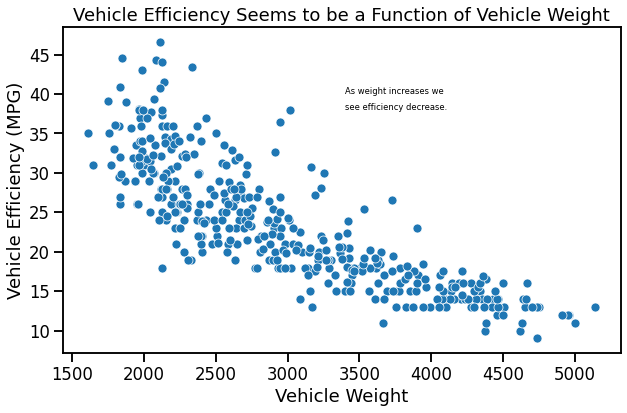

In [2]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a scatter plot with a title that states a conclusion
sns.scatterplot(data=sns.load_dataset('mpg'),
                y='mpg', x='weight', ax=ax).set_title(
    'Vehicle Efficiency Seems to be a Function of Vehicle Weight')

ax.text(3400, 40, 
        'As weight increases we', size='small')
ax.text(3400, 38, 
        'see efficiency decrease.', size='small')

plt.ylabel('Vehicle Efficiency (MPG)')
plt.xlabel('Vehicle Weight')


In [2]:
### Legends + Annotations

Text(0.5, 0, 'Penguin Length of Flipper')

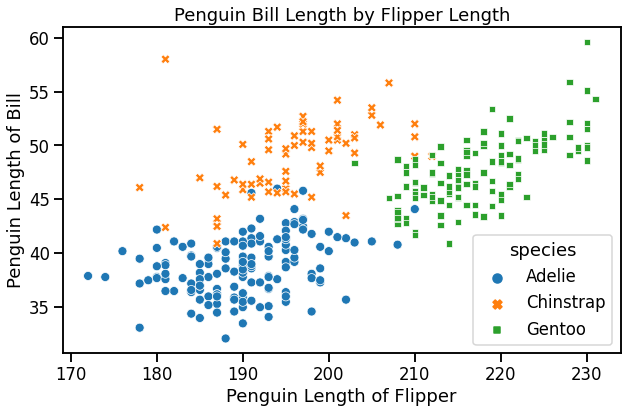

In [3]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a scatter plot with a title that states a conclusion
sns.scatterplot(data=sns.load_dataset('penguins'),
                y='bill_length_mm', 
                x='flipper_length_mm', 
                hue='species',
                style='species',
                ax=ax).set_title(
    'Penguin Bill Length by Flipper Length')

plt.ylabel('Penguin Length of Bill')
plt.xlabel('Penguin Length of Flipper')


Text(0.5, 0, 'Penguin Length of Flipper')

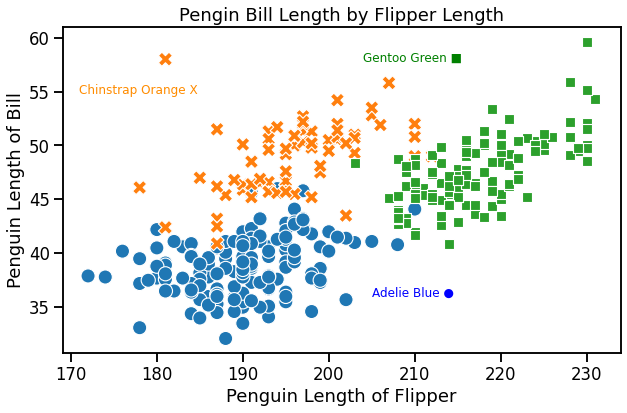

In [4]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a scatter plot with a title that states a conclusion
sns.scatterplot(data=sns.load_dataset('penguins'),
                y='bill_length_mm', 
                x='flipper_length_mm', 
                hue='species',
                style='species', 
                legend=False, 
                s=200,
                ax=ax).set_title(
    'Pengin Bill Length by Flipper Length')

ax.text(205, 36, 
        'Adelie Blue ●', 
        size='large',
        color='blue')

ax.text(171, 54.75, 
        'Chinstrap Orange X', 
        size='large',
        color='darkorange')

ax.text(204, 57.75,
        'Gentoo Green ■',
        size='large', 
        color='green')

plt.ylabel('Penguin Length of Bill')
plt.xlabel('Penguin Length of Flipper')


### Data Labels

Text(0, 0.5, 'Average Tip Amount')

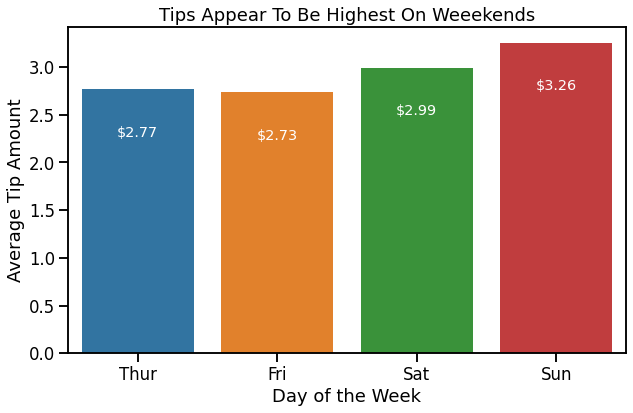

In [5]:
# Load the tips dataset
tips = sns.load_dataset("tips")

# Compute the average tip by day of the week
tips_by_day = sns.load_dataset("tips").groupby('day')['tip'].mean()

# Create a bar chart of the average tip by day of the week
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=tips_by_day.index, y=tips_by_day.values, ax=ax)

# Add labels to the bars
for i, v in enumerate(tips_by_day):
    ax.text(i, v-.5, "${:.2f}".format(v), 
            color='white',
            size='x-large',
            ha="center")

# Set the title and axis labels
plt.title('Tips Appear To Be Highest On Weeekends')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip Amount')


## The Data Science Process

### Wrangle

In [6]:
# Load ConfidentDataCh9Social.csv
df = pd.read_csv('ConfidentDataCh9SocialSents_Pub.csv', 
                 parse_dates=['Date'])

# Display the shape of the data
print(df.shape)

# Show the results
df.sample(3)


(194, 11)


,Date,ShareCommentary,Reactions,Comments,User,Sentiment_ggl,Magnitude_ggl,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk
49,2021-11-25,TOTAL FACTOR PRODUCTIVITY FOR MAJOR INDUSTRIES...,13.0,0.0,1031,-0.3,2.0,0.085,0.817,0.098,0.4424
147,2021-04-29,Navigating the healthcare system can be a tota...,14.0,4.0,1051,-0.1,1.7,0.000,0.886,0.114,0.7096
130,2021-05-04,Go team!,3.0,0.0,1021,0.9,0.9,0.000,1.000,0.000,0.0000


### Finding + Managing Outliers

In [7]:
# View for Reactions may be outliers, observe index 0 is an outlier
df.sort_values('Reactions', ascending=False).head()


,Date,ShareCommentary,Reactions,Comments,User,Sentiment_ggl,Magnitude_ggl,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk
0,2021-07-28,This is totally my youngest daughter...,221.0,39.0,1021,0.4,0.4,0.000,1.000,0.000,0.0000
1,2021-04-10,"Ok, I’m just going to say it: I am not a guy. ...",55.0,18.0,1040,-0.2,4.3,0.069,0.816,0.115,0.6115
2,2020-12-10,U.S. Department of Education has released its ...,53.0,9.0,1040,0.2,0.8,0.000,0.889,0.111,0.3595
138,2021-01-08,As someone who has experienced both high schoo...,46.0,6.0,1051,0.0,12.2,0.157,0.690,0.153,0.3297
3,2022-08-19,"This week I lost a contract. A big one.""\r\n""""...",45.0,9.0,1011,0.2,11.3,0.045,0.816,0.139,0.9632


In [8]:
# View for Comments that may be outliers, observe index 86 is an outlier
df.sort_values('Comments', ascending=False).head()


,Date,ShareCommentary,Reactions,Comments,User,Sentiment_ggl,Magnitude_ggl,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk
86,2022-08-29,It is a smart idea to explore the people your ...,8.0,314.0,1011,0.1,1.0,0.000,0.838,0.162,0.8858
4,2022-04-09,A Saturday morning creep. On LinkedIn. Total...,41.0,58.0,1020,0.0,5.0,0.223,0.777,0.000,-0.8957
23,2022-06-30,I've been seeing things lately about people go...,21.0,45.0,1020,-0.1,5.6,0.052,0.877,0.071,0.7147
0,2021-07-28,This is totally my youngest daughter...,221.0,39.0,1021,0.4,0.4,0.000,1.000,0.000,0.0000
12,2022-02-03,I am in a growth stage in my business which me...,30.0,38.0,1020,-0.1,12.6,0.048,0.828,0.125,0.9914


In [9]:
# Drop outliers
df.drop([0, 86], inplace=True)


### Engineering Additional Predictive Features

In [10]:
# Engineer a new feature that will show length of the post
df['len'] = df['ShareCommentary'].str.len()

df['group'] = df['User'].map({1010:'Biz Owner',1011:'Biz Owner',
                              1020:'Biz Owner',1021:'Biz Owner',
                              1030:'Economist',1031:'Economist',
                              1040:'C-Suite',1041:'C-Suite',
                              1050:'Marketing',1051:'Marketing'})

# Count the number of hastags in each post
df['hashtags'] = df['ShareCommentary'].str.count('#')

# Show the results
df.sample(6)

,Date,ShareCommentary,Reactions,Comments,User,Sentiment_ggl,Magnitude_ggl,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk,len,group,hashtags
17,2021-02-27,#LoveData,25.0,0.0,1041,0.3,0.3,0.000,1.000,0.000,0.0000,9,C-Suite,1
109,2020-12-09,My tech friend JackJohn recently tagged me on ...,1.0,1.0,1010,-0.3,1.0,0.000,0.826,0.174,0.7096,258,Biz Owner,13
173,2014-01-21,I can't help but feel skeptical about the hype...,8.0,7.0,1051,-0.6,1.2,0.132,0.723,0.145,0.1808,286,Marketing,0
127,2021-07-01,First-time claims for unemployment insurance t...,5.0,0.0,1030,-0.2,1.3,0.048,0.923,0.028,-0.5411,965,Economist,20
112,2020-12-22,This would be a great opportunity for #DataSci...,3.0,0.0,1010,0.3,3.0,0.000,0.779,0.221,0.9786,671,Biz Owner,1
167,2020-12-28,Turning down a job offer can be a tough decisi...,10.0,5.0,1050,0.0,4.0,0.268,0.590,0.142,-0.9919,1259,Marketing,3


## The Charts
### Scatter Plots

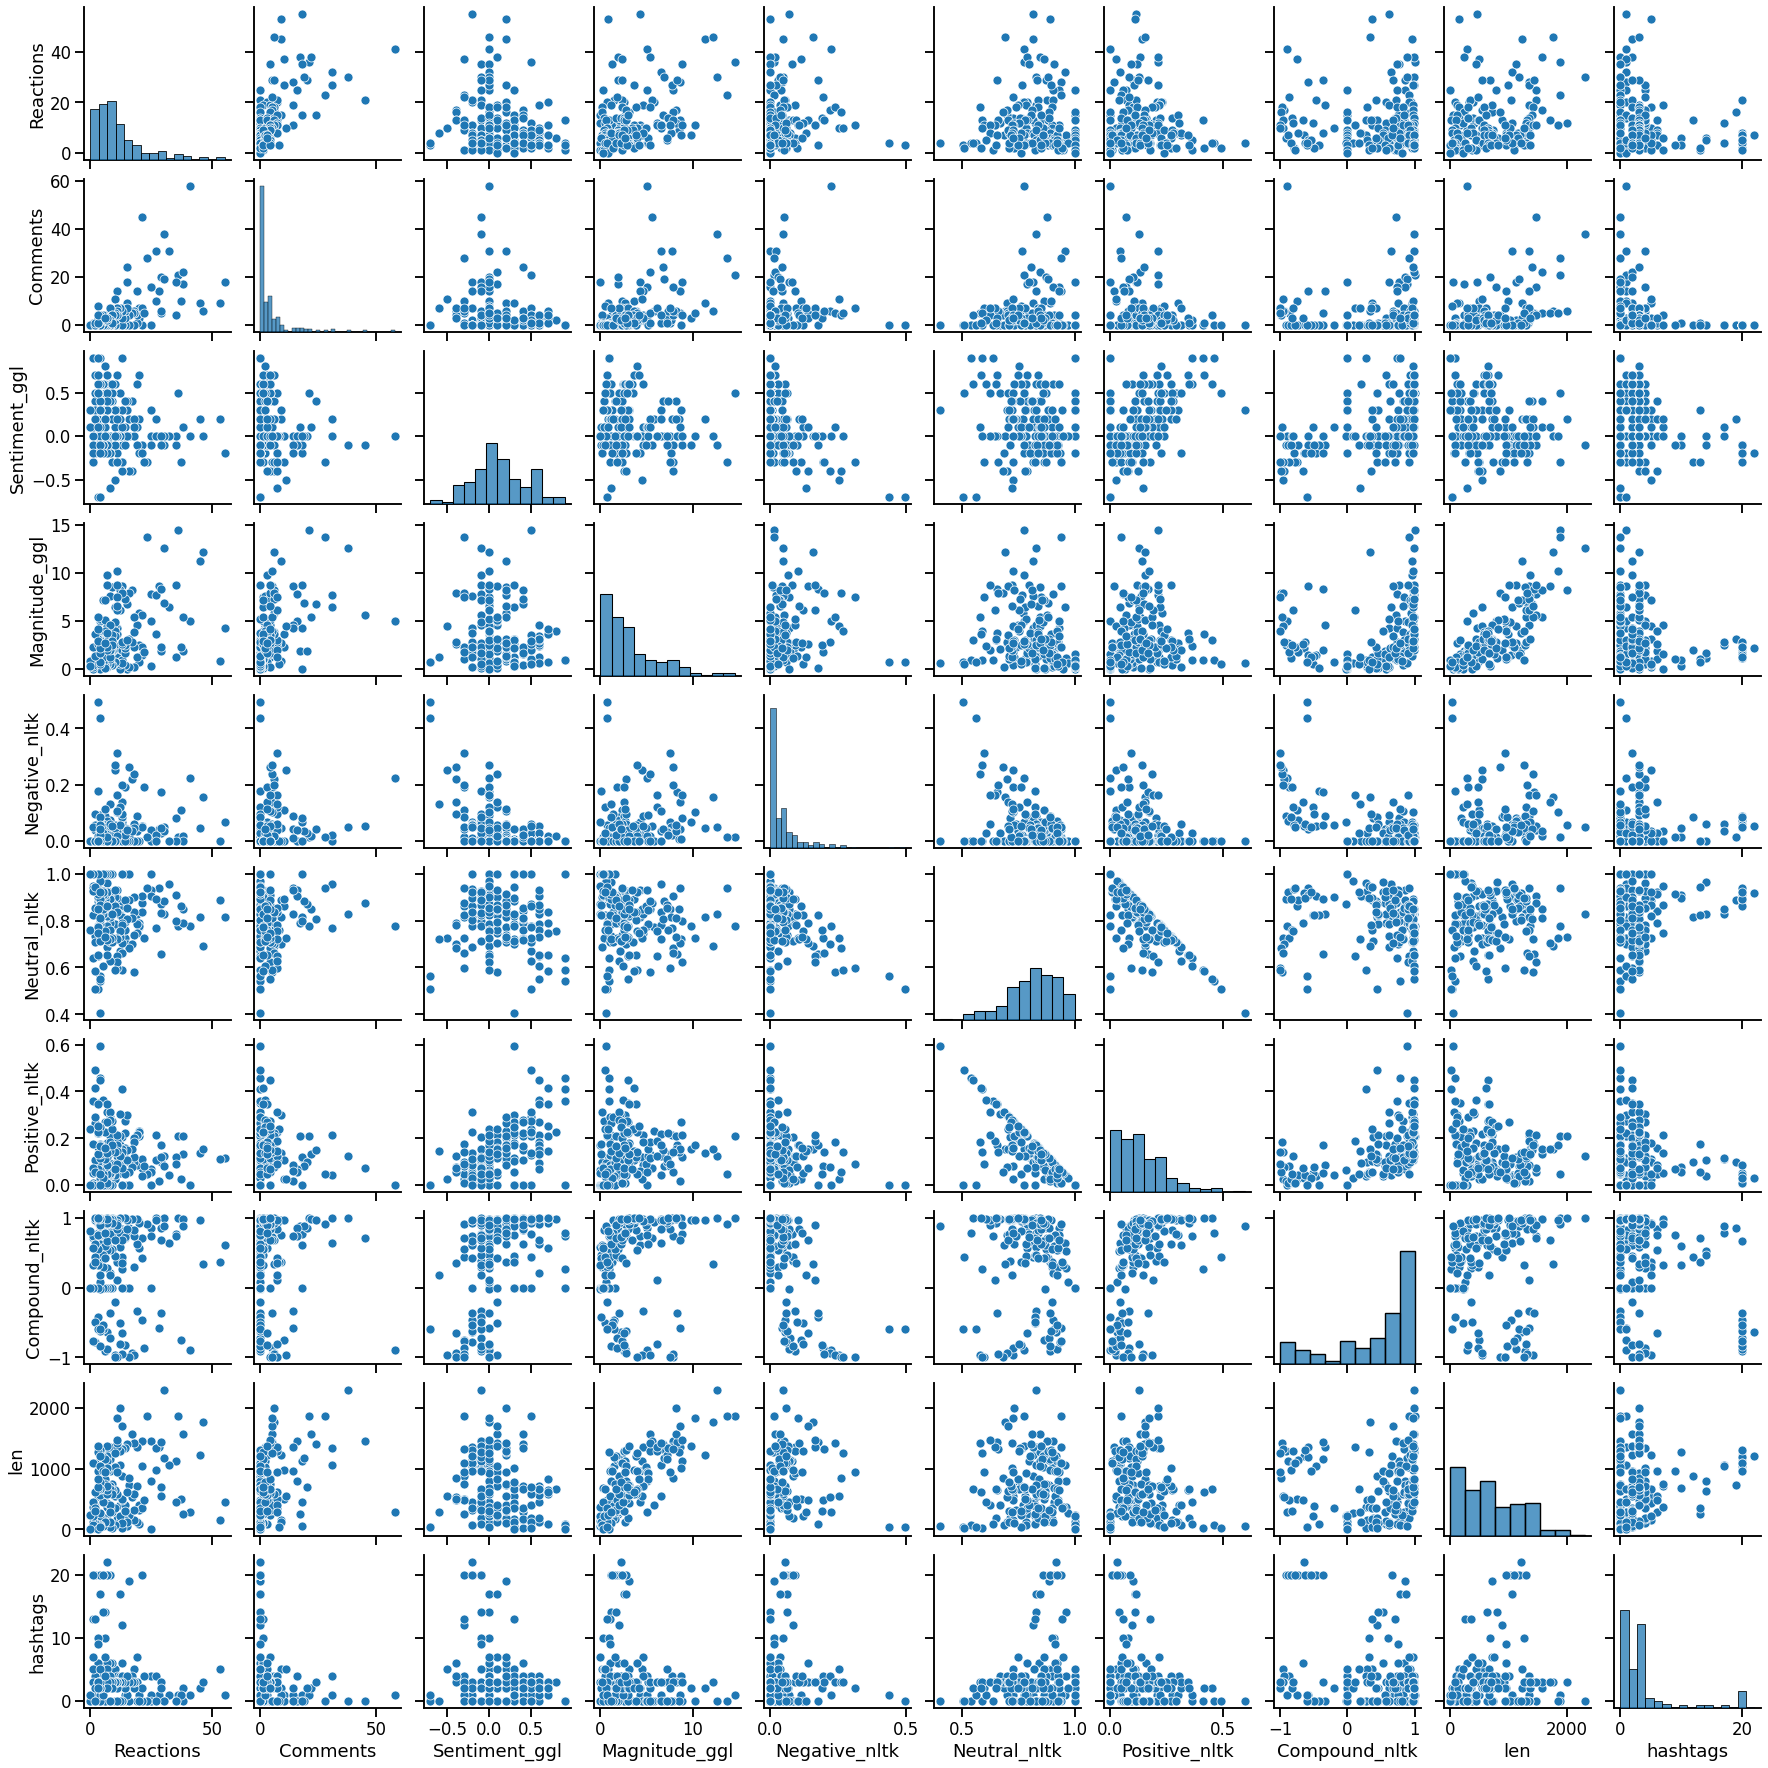

In [11]:
sns.pairplot(df[['Reactions','Comments','Sentiment_ggl',
                 'Magnitude_ggl','Negative_nltk','Neutral_nltk',
                 'Positive_nltk','Compound_nltk','len',
                 'hashtags']])

In [12]:
df[['Reactions','Comments','Sentiment_ggl',
    'Magnitude_ggl','Negative_nltk','Neutral_nltk',
    'Positive_nltk','Compound_nltk','len',
    'hashtags']].corr()


,Reactions,Comments,Sentiment_ggl,Magnitude_ggl,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk,len,hashtags
Reactions,1.000000,0.636917,-0.157704,0.426088,0.119236,0.013979,-0.097863,-0.004379,0.230997,-0.173567
Comments,0.636917,1.000000,-0.145567,0.480816,0.119877,0.005344,-0.088964,0.048143,0.340855,-0.226637
Sentiment_ggl,-0.157704,-0.145567,1.000000,-0.089720,-0.537168,-0.165442,0.552046,0.475427,-0.240813,-0.247328
Magnitude_ggl,0.426088,0.480816,-0.089720,1.000000,0.209116,-0.195800,0.063747,0.207482,0.797749,-0.163028
Negative_nltk,0.119236,0.119877,-0.537168,0.209116,1.000000,-0.424499,-0.242949,-0.592831,0.187724,0.025836
Neutral_nltk,0.013979,0.005344,-0.165442,-0.195800,-0.424499,1.000000,-0.775162,-0.108477,-0.024560,0.258551
Positive_nltk,-0.097863,-0.088964,0.552046,0.063747,-0.242949,-0.775162,1.000000,0.529394,-0.104885,-0.295371
Compound_nltk,-0.004379,0.048143,0.475427,0.207482,-0.592831,-0.108477,0.529394,1.000000,0.084567,-0.347392
len,0.230997,0.340855,-0.240813,0.797749,0.187724,-0.024560,-0.104885,0.084567,1.000000,0.233969
hashtags,-0.173567,-0.226637,-0.247328,-0.163028,0.025836,0.258551,-0.295371,-0.347392,0.233969,1.000000


Text(0.5, 1.0, 'Hashtag Count')

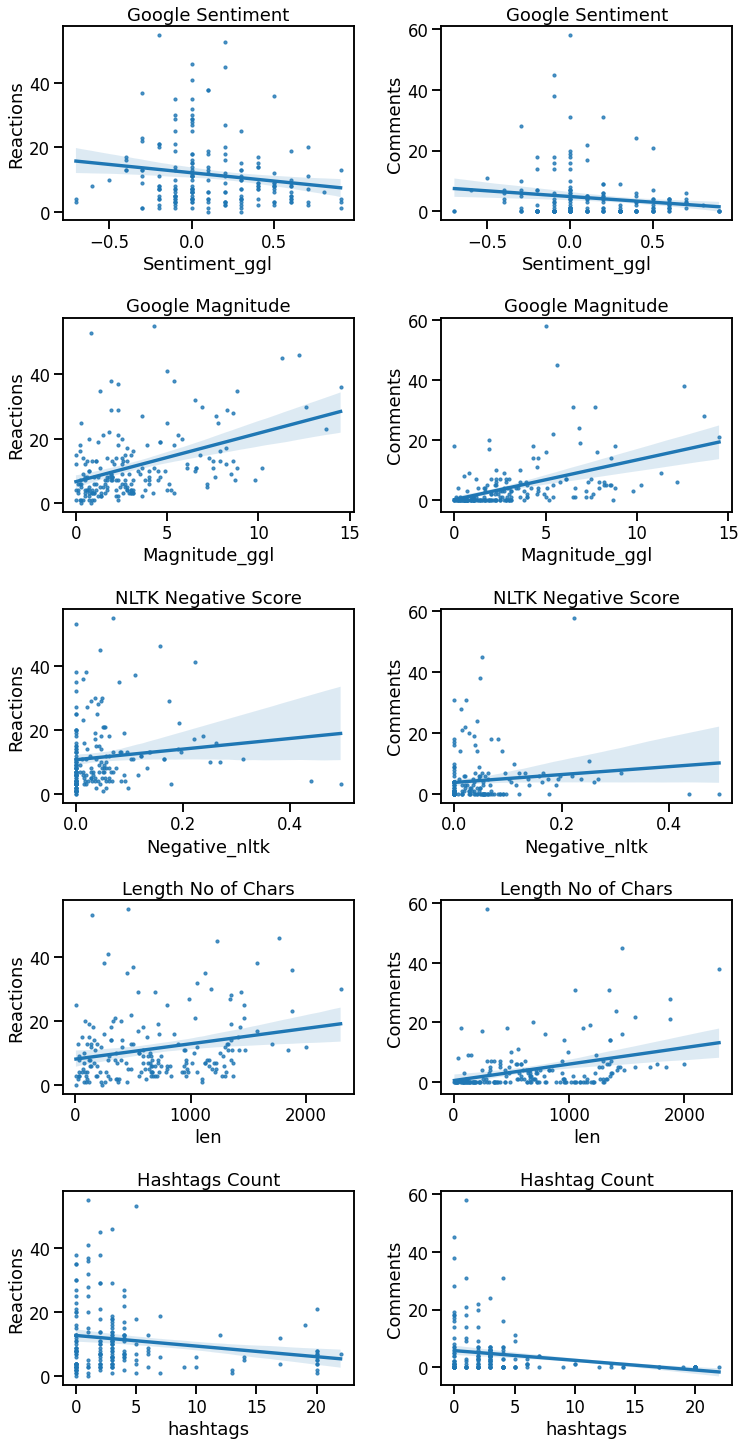

In [13]:
fig, axes = plt.subplots(figsize=(12, 25), ncols=2,
                         nrows=5, squeeze=False)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

sns.regplot(data=df,
            ax=axes[0,0],
            x='Sentiment_ggl',
            y='Reactions',
            scatter_kws={'s': 10}
           ).set_title('Google Sentiment')

sns.regplot(data=df,
            ax=axes[0,1],
            x='Sentiment_ggl',
            y='Comments',
            scatter_kws={'s': 10}
           ).set_title('Google Sentiment')

sns.regplot(data=df,
            ax=axes[1,0],
            x='Magnitude_ggl',
            y='Reactions',
            scatter_kws={'s': 10}
           ).set_title('Google Magnitude')

sns.regplot(data=df,
            ax=axes[1,1],
            x='Magnitude_ggl',
            y='Comments',
            scatter_kws={'s': 10}
           ).set_title('Google Magnitude')

sns.regplot(data=df,
            ax=axes[2,0],
            x='Negative_nltk',
            y='Reactions',
            scatter_kws={'s': 10}
           ).set_title('NLTK Negative Score')

sns.regplot(data=df,
            ax=axes[2,1],
            x='Negative_nltk',
            y='Comments',
            scatter_kws={'s': 10}
           ).set_title('NLTK Negative Score')

sns.regplot(data=df,
            ax=axes[3,0],
            x='len',
            y='Reactions',
            scatter_kws={'s': 10}
           ).set_title('Length No of Chars')

sns.regplot(data=df,
            ax=axes[3,1],
            x='len',
            y='Comments',
            scatter_kws={'s': 10}
           ).set_title('Length No of Chars')

sns.regplot(data=df,
            ax=axes[4,0],
            x='hashtags',
            y='Reactions',
            scatter_kws={'s': 10}
           ).set_title('Hashtags Count')

sns.regplot(data=df,
            ax=axes[4,1],
            x='hashtags',
            y='Comments',
            scatter_kws={'s': 10}
           ).set_title('Hashtag Count')


### Bar Chart

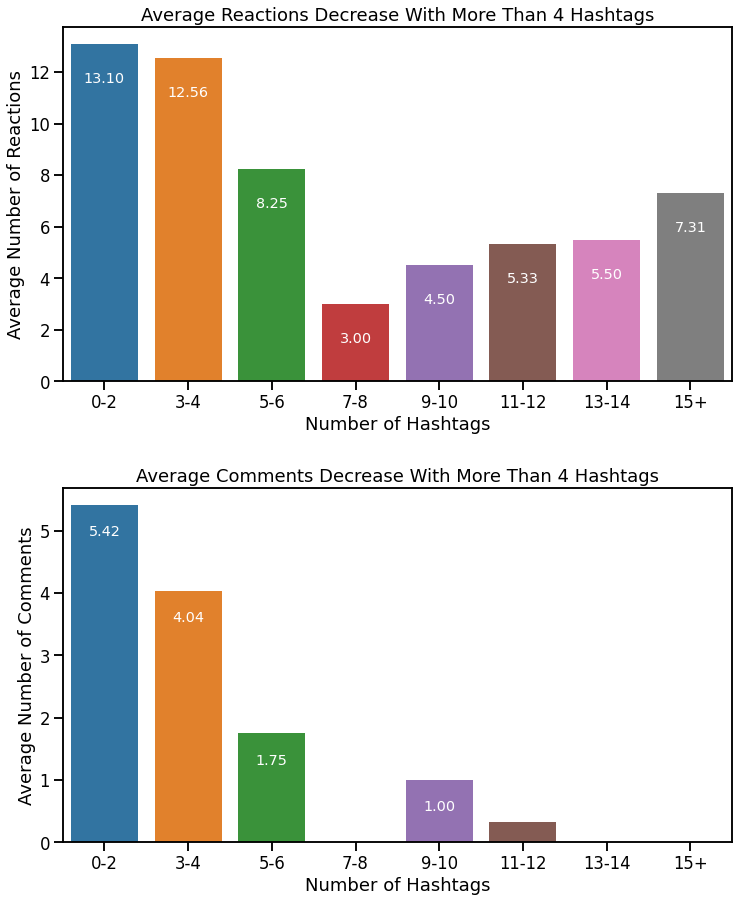

In [14]:
# Generate bar charts to explore hashtags
fig, axes = plt.subplots(figsize=(12, 15), nrows=2, ncols=1)
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Define the custom categories for the ordinal variable
categories = ['0-2', '3-4', '5-6', '7-8', '9-10', '11-12', '13-14', '15+']

# Convert the discrete variable to an ordinal
df['hash_cat'] = pd.cut(df['hashtags'], 
                        bins=[0, 3, 5, 7, 9, 11, 13, 15, 1000], 
                        labels=categories).astype('category')

# Calculate reactions + comments by hash_cat
reaction_by_hash = df.groupby('hash_cat')['Reactions'].mean()
comments_by_hash = df.groupby('hash_cat')['Comments'].mean()

# Create a bar chart for reactions by hash_cat
sns.barplot(x=reaction_by_hash.index, y=reaction_by_hash.values, ax=axes[0])

# Add labels to the bars
for i, v in enumerate(reaction_by_hash):
    axes[0].text(i, v-1.5, "{:.2f}".format(v), 
            color='white',
            size='x-large',
            ha="center")

# Set the title and axis labels
axes[0].set_title('Average Reactions Decrease With More Than 4 Hashtags')
axes[0].set_xlabel('Number of Hashtags')
axes[0].set_ylabel('Average Number of Reactions')

# Create a bar chart for comments by hash_cat
sns.barplot(x=comments_by_hash.index, y=comments_by_hash.values, ax=axes[1])

# Add labels to the bars
for i, v in enumerate(comments_by_hash):
    if v >= 1:
        axes[1].text(i, v-.5, "{:.2f}".format(v), 
                color='white',
                size='x-large',
                ha="center")

# Set the title and axis labels
axes[1].set_title('Average Comments Decrease With More Than 4 Hashtags')
axes[1].set_xlabel('Number of Hashtags')
axes[1].set_ylabel('Average Number of Comments')

# Display the charts
plt.show()

### Violin + Boxplots

In [15]:
# Define the custom categories for the binary variable
hashbins = ['0-4', '5+']

# Convert the discrete variable to a binary
df['hash_bins'] = pd.cut(df['hashtags'], 
                         bins=[0, 5, 1000], 
                         labels=hashbins).astype('category')

# Calculate reactions + comments by hash_bins
reaction_by_hashbins = df.groupby('hash_bins')['Reactions']
comments_by_hashbins = df.groupby('hash_bins')['Comments']

# Display the summary statistics for reaction_by_hashbins
reaction_by_hashbins.describe()


,count,mean,std,min,25%,50%,75%,max
hash_bins,,,,,,,,
0-4,108.0,12.972222,11.353667,0.0,5.00,10.0,15.25,55.0
5+,32.0,6.937500,4.996370,1.0,3.75,6.0,8.00,21.0


In [16]:
# Display the summary statistics for comments_by_hashbins
comments_by_hashbins.describe()

,count,mean,std,min,25%,50%,75%,max
hash_bins,,,,,,,,
0-4,108.0,5.101852,8.059289,0.0,0.0,3.0,6.0,58.0
5+,32.0,0.531250,1.106706,0.0,0.0,0.0,1.0,4.0


[Text(0, 0, ''), Text(0, 1, '')]

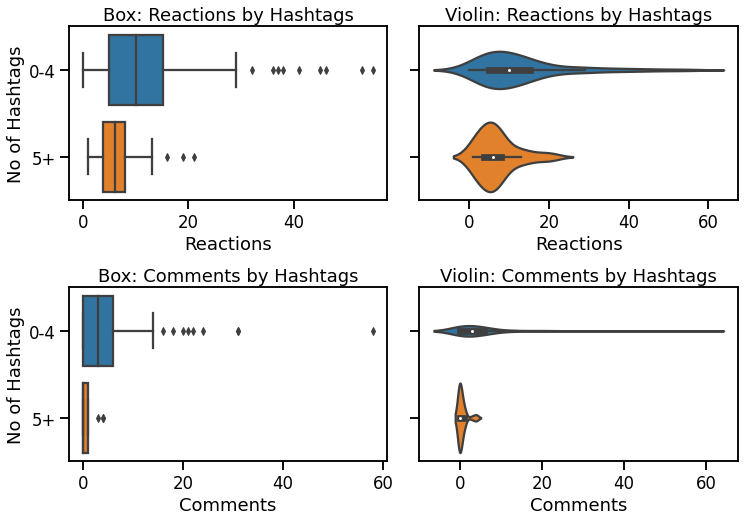

In [17]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.1)

# Upper left: box plot of Reactions by hash_bins
sns.boxplot(x='Reactions', y='hash_bins', data=df, ax=axes[0][0])
axes[0][0].set_title('Box: Reactions by Hashtags')
axes[0][0].set_ylabel('No of Hashtags')

# Upper right: violin plot of Reactions by hash_bins
sns.violinplot(x='Reactions', y='hash_bins', data=df, ax=axes[0][1])
axes[0][1].set_title('Violin: Reactions by Hashtags')
axes[0][1].set_ylabel('')
axes[0][1].set_yticklabels('')

# Lower left: box plot of Comments by hash_bins
sns.boxplot(x='Comments', y='hash_bins', data=df, ax=axes[1][0])
axes[1][0].set_title('Box: Comments by Hashtags')
axes[1][0].set_ylabel('No of Hashtags')

# Lower right: violin plot of Comments by hash_bins
sns.violinplot(x='Comments', y='hash_bins',data=df, ax=axes[1][1])
axes[1][1].set_title('Violin: Comments by Hashtags')
axes[1][1].set_ylabel('')
axes[1][1].set_yticklabels('')

Text(0, 0.5, '')

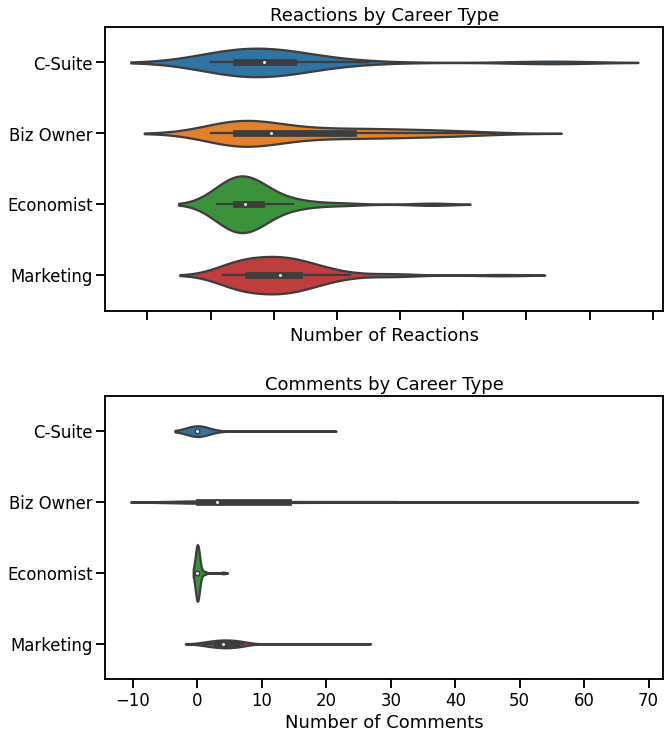

In [18]:
# Examine engagement across career type
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

# Upper: violin plot of Reactions by user career type
sns.violinplot(x='Reactions', y='group', data=df, ax=axes[0])
axes[0].set_title('Reactions by Career Type')
axes[0].set_xlabel('Number of Reactions')
axes[0].set_ylabel('')
axes[0].set_xticklabels('')

# Lower: violin plot of Comments by user career type
sns.violinplot(x='Comments', y='group',data=df, ax=axes[1])
axes[1].set_title('Comments by Career Type')
axes[1].set_xlabel('Number of Comments')
axes[1].set_ylabel('')


### Heatmaps

In [38]:
# Create a pivot table that will show the average sentiment by day of week.
df['day_name'] = df['Date'].dt.day_name()


In [78]:
# Create a pivot table to find the mean number of reactions by day
reactions_by_day = pd.pivot_table(
    data=df, values='Reactions', columns='day_name', 
    aggfunc='median').fillna(0.0)

reactions_by_day = reactions_by_day.reindex(
    columns=['Monday', 'Tuesday', 'Wednesday', 
             'Thursday', 'Friday', 'Saturday', 'Sunday'])

reactions_by_day

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Reactions,8.0,7.5,8.5,8.0,12.0,9.0,7.0


In [79]:
# Create a pivot table to find the mean number of reactions by day
# firther also review mean ractions by career type
reactions_x_day_x_group = pd.pivot_table(
    data=df, values='Reactions', index='group', 
    columns='day_name', aggfunc='median').fillna(0.0)

reactions_x_day_x_group = reactions_x_day_x_group.reindex(
    columns=['Monday', 'Tuesday', 'Wednesday', 
             'Thursday', 'Friday', 'Saturday', 'Sunday'])

reactions_x_day_x_group

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
group,,,,,,,
Biz Owner,7.0,10.0,4.0,13.0,19.0,21.0,6.0
C-Suite,0.0,3.0,10.5,10.0,9.0,12.0,0.0
Economist,6.0,3.0,10.0,5.5,5.0,4.0,4.5
Marketing,9.5,9.0,14.0,10.0,13.5,13.0,7.0


Text(55.5, 0.5, '')

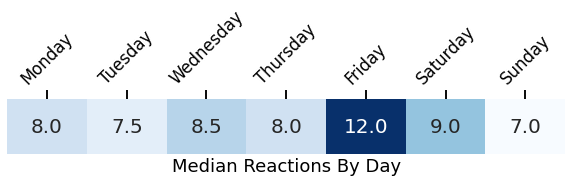

In [81]:
fig, ax = plt.subplots(figsize=(10, 1))

sns.heatmap(reactions_by_day, annot=True, fmt=".1f", cbar=False,
cmap='Blues', annot_kws={"size": 20})

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
ax.xaxis.tick_top()
ax.set_yticks([])
ax.set_xlabel('Median Reactions By Day')
ax.set_ylabel('')

Text(55.5, 0.5, '')

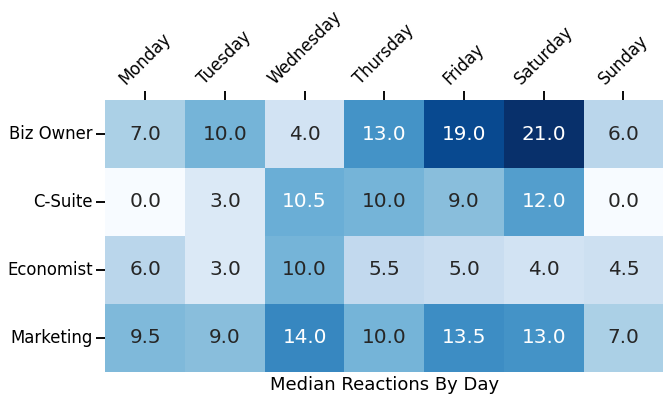

In [83]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(reactions_x_day_x_group, annot=True, fmt=".1f", 
            cbar=False, cmap='Blues', annot_kws={"size": 20})

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
ax.xaxis.tick_top()
ax.set_xlabel('Median Reactions By Day')
ax.set_ylabel('')

In [77]:
reactions_x_day_x_group

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
group,,,,,,,
Biz Owner,7.0,10.0,4.0,13.0,19.0,21.0,6.0
C-Suite,0.0,3.0,10.5,10.0,9.0,12.0,0.0
Economist,6.0,3.0,10.0,5.5,5.0,4.0,4.5
Marketing,9.5,9.0,14.0,10.0,13.5,13.0,7.0


### Bubble Chart

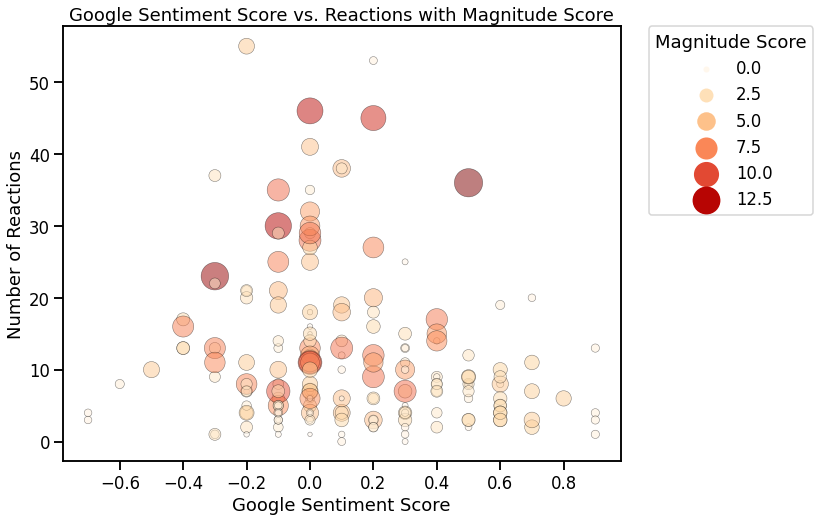

In [96]:
plt.figure(figsize=(10, 8))
# Create a bubble chart
sns.scatterplot(data=df, x='Sentiment_ggl', y='Reactions',
                size='Magnitude_ggl', hue='Magnitude_ggl', 
                sizes=(20, 800), alpha=0.5, edgecolor='k', 
                palette='OrRd', legend='brief')

# Set the title and axis labels
plt.title('Google Sentiment Score vs. Reactions with Magnitude Score')
plt.xlabel('Google Sentiment Score')
plt.ylabel('Number of Reactions')

# Move the legend outside the graph area
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           title='Magnitude Score')

In [109]:
# Using estimated filters search for a specific observation
df[(df['Reactions'] > 30) & 
   (df['Sentiment_ggl'] > .4) & 
   (df['Magnitude_ggl'] > 10)]

,Date,ShareCommentary,Reactions,Comments,User,Sentiment_ggl,Magnitude_ggl,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk,len,group,hashtags,hash_cat,hash_bins,day_name
5,2021-11-11,"A week out from Thanksgiving, and I have found...",36.0,21.0,1021,0.5,14.5,0.014,0.776,0.21,0.9968,1875,Biz Owner,1,0-2,0-4,Thursday


In [122]:
# Read the actual post from that observation
df[(df['Reactions'] > 30) & 
   (df['Sentiment_ggl'] > .4) & 
   (df['Magnitude_ggl'] > 10)]['ShareCommentary'][5]

'A week out from Thanksgiving, and I have found myself so reflective of what I am thankful for this year.  So, I think I will share some of those things over the next week (in no particular order)....."\r\n""\r\n"Today I am thankful for flannel pajamas, king size down comforters, and the ability to use them both while working."\r\n""\r\n"That\'s right.  I got up this morning, worked out, got everyone to school, showered, then PUT MY PJ\'s BACK ON!!!"\r\n""\r\n"Then I draped myself with a king sized down comforter while sitting at my desk."\r\n""\r\n"Amazing."\r\n""\r\n"A million years ago when I was in corporate wearing heels every.single.day I never could have dreamed of working in an environment that made me so 100% comfortable that I could really do my best work."\r\n""\r\n"I never dreamed that (like this last Monday) I would meet with a client who was also wearing a sweatshirt.  Whose son would walk in for help during the call.  And we would all be TOTALLY accepting of it.  Even (d

### Histogram

## Update + Change Log

March, 2023 - Created notebook.<br>
April, 2023 - Prepared for GitHub.